In [2]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from lisa.config import PROCESSED_DATA_DIR

input_path: Path = PROCESSED_DATA_DIR / "pilot_data.csv"

df = pl.read_csv(input_path)

df

2024-08-13 17:04:34.176 | INFO     | lisa.config:<module>:15 - PROJ_ROOT path is: /Users/tomwilson/code/LISA


TRIAL,TIME,first_Electric Potential.1,last_Electric Potential.1,max_Electric Potential.1,min_Electric Potential.1,mean_Electric Potential.1,std_Electric Potential.1,first_D1_Global Angle.x,last_D1_Global Angle.x,max_D1_Global Angle.x,min_D1_Global Angle.x,mean_D1_Global Angle.x,std_D1_Global Angle.x,first_D1_Global Angle.y,last_D1_Global Angle.y,max_D1_Global Angle.y,min_D1_Global Angle.y,mean_D1_Global Angle.y,std_D1_Global Angle.y,first_D1_Global Angle.z,last_D1_Global Angle.z,max_D1_Global Angle.z,min_D1_Global Angle.z,mean_D1_Global Angle.z,std_D1_Global Angle.z,first_D1_HighG.x,last_D1_HighG.x,max_D1_HighG.x,min_D1_HighG.x,mean_D1_HighG.x,std_D1_HighG.x,first_D1_HighG.y,last_D1_HighG.y,max_D1_HighG.y,min_D1_HighG.y,mean_D1_HighG.y,…,first_D7_gyro.x,last_D7_gyro.x,max_D7_gyro.x,min_D7_gyro.x,mean_D7_gyro.x,std_D7_gyro.x,first_D7_gyro.y,last_D7_gyro.y,max_D7_gyro.y,min_D7_gyro.y,mean_D7_gyro.y,std_D7_gyro.y,first_D7_gyro.z,last_D7_gyro.z,max_D7_gyro.z,min_D7_gyro.z,mean_D7_gyro.z,std_D7_gyro.z,first_D7_mag.x,last_D7_mag.x,max_D7_mag.x,min_D7_mag.x,mean_D7_mag.x,std_D7_mag.x,first_D7_mag.y,last_D7_mag.y,max_D7_mag.y,min_D7_mag.y,mean_D7_mag.y,std_D7_mag.y,first_D7_mag.z,last_D7_mag.z,max_D7_mag.z,min_D7_mag.z,mean_D7_mag.z,std_D7_mag.z,ACTIVITY
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0,299,3.131464,0.297907,3.785151,0.27746,2.581347,1.445571,2.257107,2.133543,2.257107,2.133543,2.186005,0.025971,0.021965,-0.530777,0.097351,-0.530777,-0.021068,0.160638,1.961349,2.23842,2.23842,1.873504,2.017557,0.135867,12.916076,13.346611,25.353779,11.95933,16.821993,3.303436,4.066172,1.937411,11.002583,-3.826985,1.741278,…,0.141645,0.276847,4.011855,-6.30054,-0.359595,2.039678,1.775887,-0.308317,1.775887,-1.49526,-0.183394,0.780013,-6.670628,1.059515,3.692355,-6.67116,-0.020432,3.480854,-0.000041,-0.000044,-0.000041,-0.000046,-0.000044,0.000001,-0.000028,-0.000021,-0.000007,-0.000028,-0.000015,0.000006,-0.000018,-0.000018,-0.000012,-0.000018,-0.000015,0.000002,"""walk"""
0,300,3.130854,0.290278,3.785151,0.27746,2.571877,1.45125,2.255623,2.133151,2.255623,2.133151,2.185592,0.025822,0.022602,-0.537833,0.097351,-0.537833,-0.022934,0.163365,1.959735,2.238629,2.238629,1.873504,2.018482,0.136425,12.868238,13.394449,25.353779,11.95933,16.823587,3.30166,3.994416,2.152679,11.002583,-3.826985,1.7349,…,0.233022,0.124072,4.011855,-6.30054,-0.359653,2.039663,1.775089,-0.305655,1.775089,-1.49526,-0.190332,0.77174,-6.670681,1.062337,3.692355,-6.67116,0.005344,3.460013,-0.000041,-0.000044,-0.000041,-0.000046,-0.000044,0.000001,-0.000028,-0.000021,-0.000007,-0.000028,-0.000015,0.000006,-0.000018,-0.000018,-0.000012,-0.000018,-0.000015,0.000002,"""walk"""
0,301,3.118952,0.283259,3.785151,0.27746,2.562385,1.456884,2.254139,2.132746,2.254139,2.132746,2.185183,0.025682,0.023239,-0.544891,0.097351,-0.544891,-0.024826,0.166098,1.958121,2.238827,2.238827,1.873504,2.019412,0.136974,12.820401,13.442286,25.353779,11.95933,16.825501,3.299525,3.92266,2.367947,11.002583,-3.826985,1.729478,…,0.324399,-0.028702,4.011855,-6.30054,-0.360526,2.039465,1.77429,-0.302992,1.77429,-1.49526,-0.197259,0.763321,-6.670734,1.06516,3.692355,-6.67116,0.031131,3.438854,-0.000041,-0.000044,-0.000041,-0.000046,-0.000044,0.000001,-0.000028,-0.000021,-0.000007,-0.000028,-0.000015,0.000006,-0.000018,-0.000018,-0.000012,-0.000018,-0.000015,0.000002,"""walk"""
0,302,3.168391,0.284785,3.785151,0.27746,2.552937,1.462441,2.252655,2.132331,2.252655,2.132331,2.184777,0.02555,0.023875,-0.551951,0.097351,-0.551951,-0.026743,0.168839,1.956507,2.239013,2.239013,1.873504,2.020348,0.137512,12.772564,13.490124,25.353779,11.95933,16.827733,3.297032,3.850904,2.583215,11.002583,-3.826985,1.725014,…,0.415776,-0.181476,4.011855,-6.30054,-0.362212,2.039106,1.7

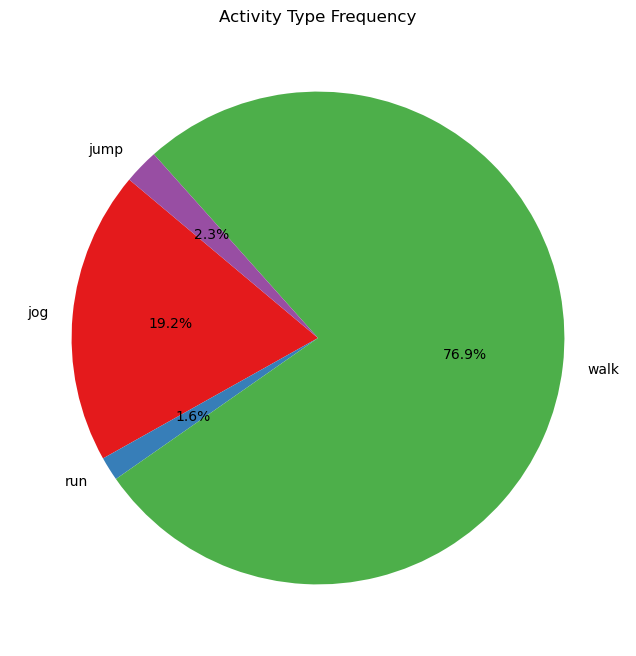

In [3]:
# pie chart of activity type
activity_counts = df['ACTIVITY'].value_counts()
df_dict = dict(zip(activity_counts['ACTIVITY'].to_list(), activity_counts['count'].to_list(), strict=False))

plt.figure(figsize=(8, 8))
plt.pie(df_dict.values(), labels=df_dict.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Activity Type Frequency')
plt.show()

In [14]:
foot_df = df.select([col for col in df.columns if 'Electric Potential' in col] + ['ACTIVITY'])

<Axes: xlabel='mean_Electric Potential.1', ylabel='max_Electric Potential.1'>

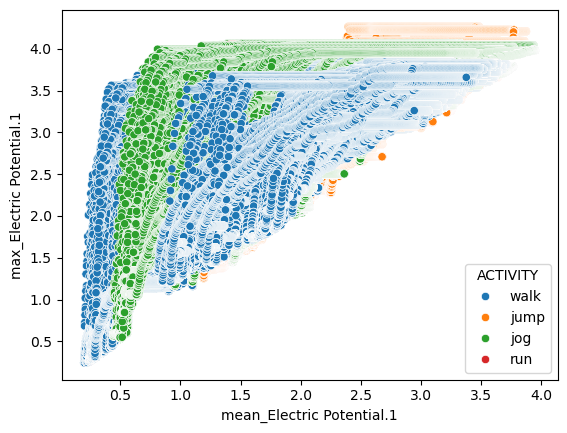

In [15]:
sns.scatterplot(data=foot_df, x='mean_Electric Potential.1', y='max_Electric Potential.1', hue='ACTIVITY')

<Axes: xlabel='mean_Electric Potential.1', ylabel='Count'>

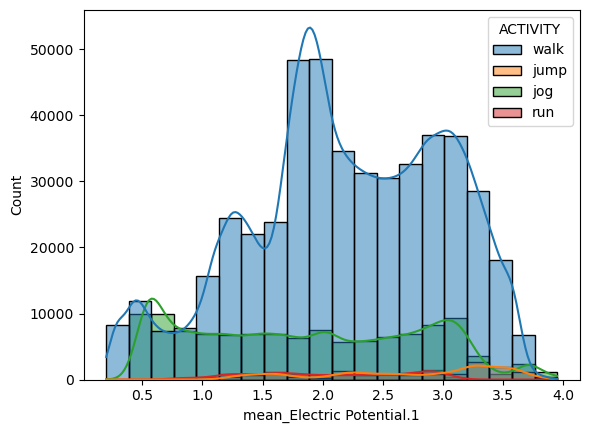

In [16]:
sns.histplot(data=foot_df, x='mean_Electric Potential.1', bins=20, hue='ACTIVITY', kde=True)

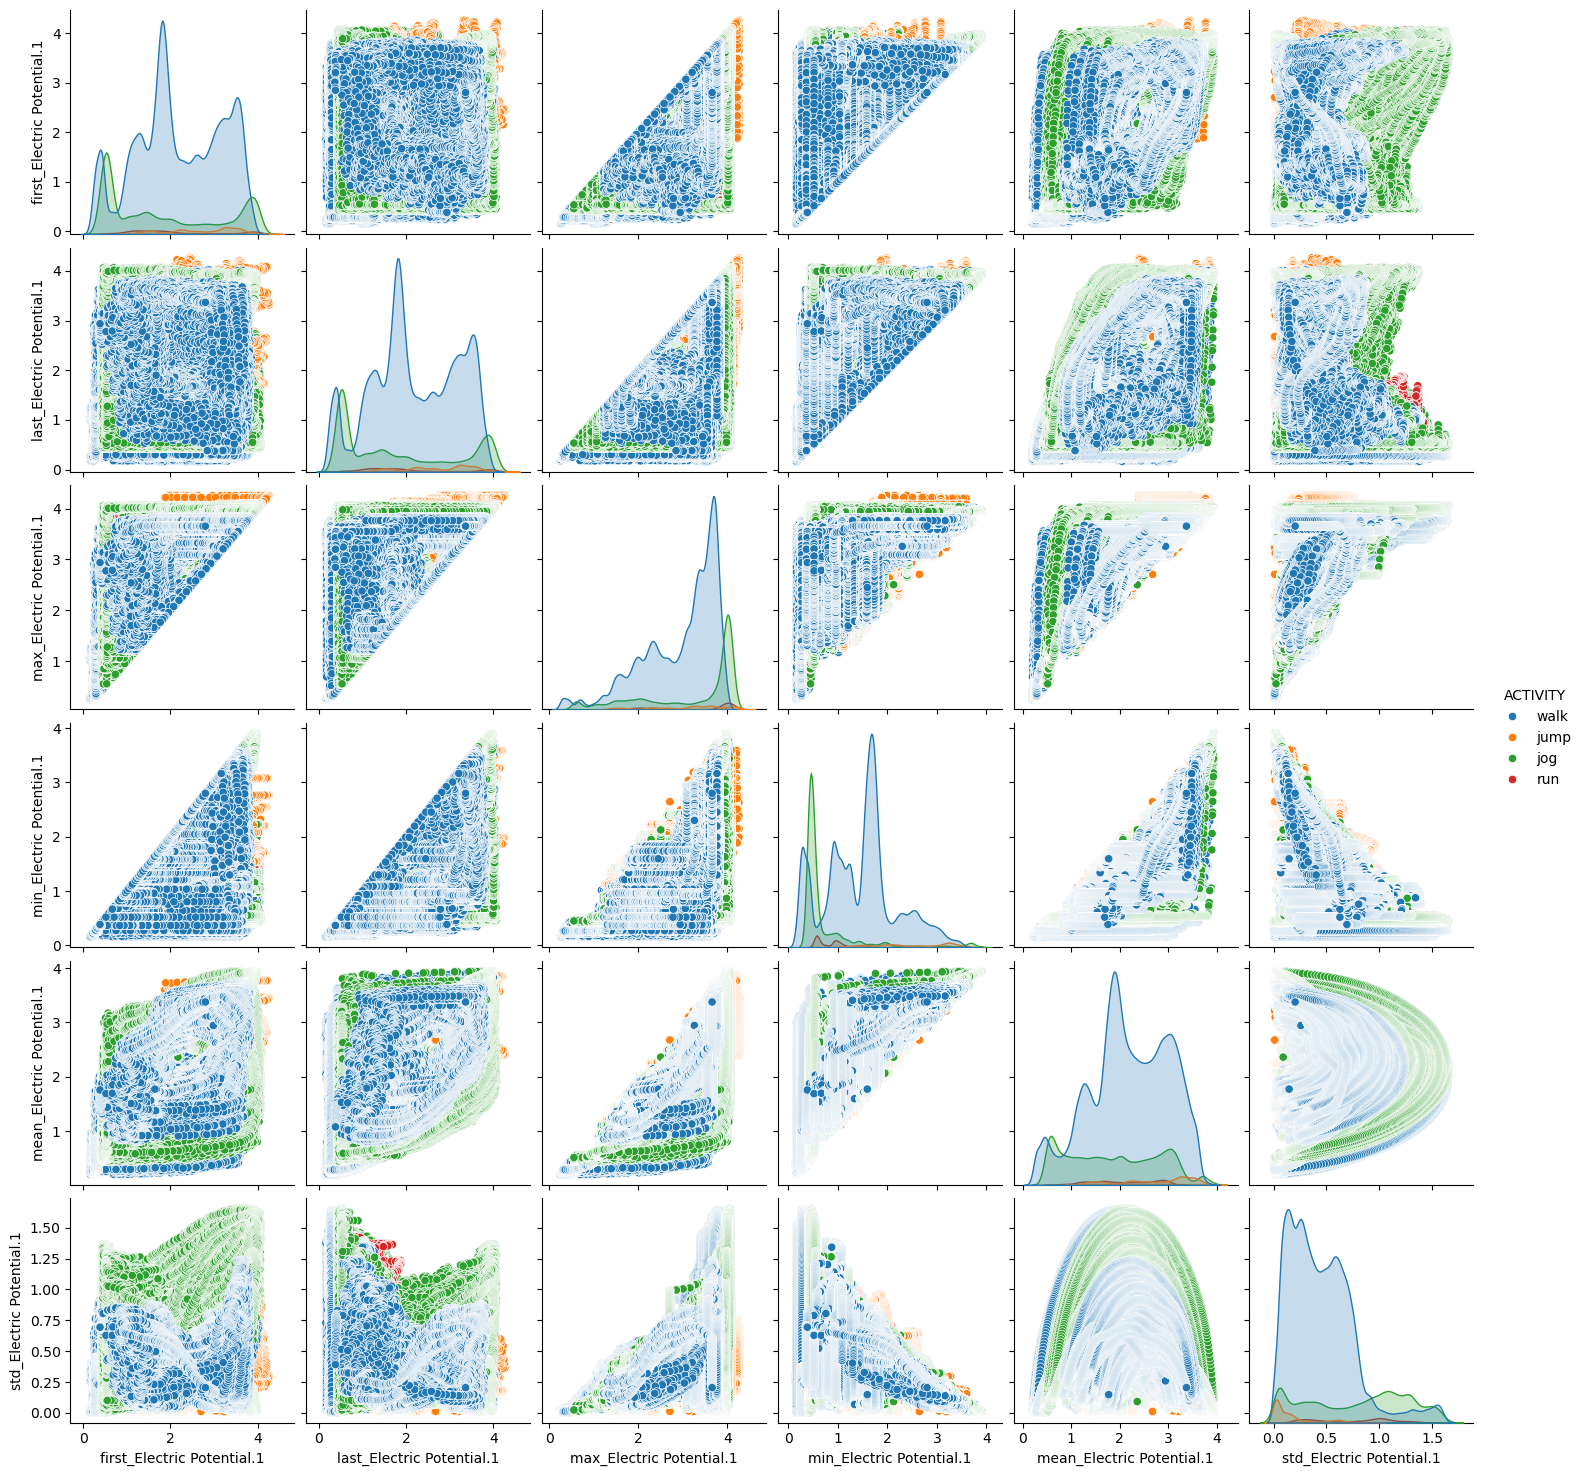

In [19]:
sns.pairplot(data=foot_df.to_pandas(), hue='ACTIVITY')